# To Do
## Removal of shot distance outliers (should fix auto-scaling of shot selection plots)

In [24]:
import pandas as pd
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import numpy as np
from matplotlib.patches import Circle, Rectangle, Arc

import matplotlib.colors as mcolor
import scipy.stats.mstats as scism
#%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/willhawkins/anaconda2/envs/DataScience3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
x = pd.read_csv("data.csv")
#y = x.pop('shot_made_flag')
x.head(50)
#x.shape


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [26]:
# There's no missing data
x.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


Text(0.5, 1.0, 'Distribution of Shot Distances (feet)')

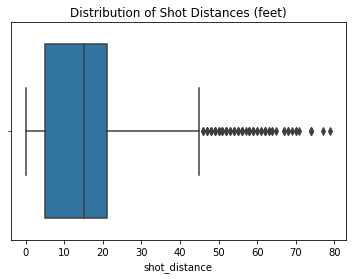

In [27]:
#Outliers Present (box plot)
sns.boxplot(x=x['shot_distance'])
plt.title("Distribution of Shot Distances (feet)")

Text(0.5, 1.0, 'Distribution of Made Shot Distances (feet)')

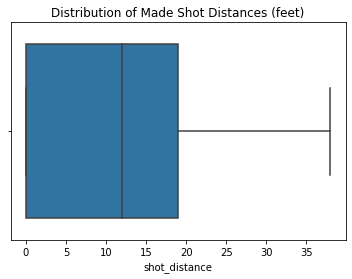

In [28]:
# Made Outliers Present (box plot)
sns.boxplot(x=made['shot_distance'])
plt.title("Distribution of Made Shot Distances (feet)")

Text(0.5, 1.0, 'Distribution of Missed Shot Distances (feet)')

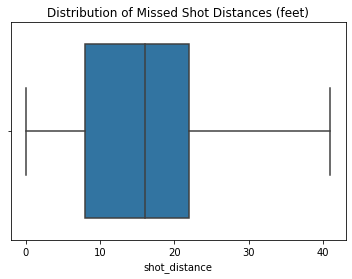

In [29]:
# Missed Outliers Present (box plot)
sns.boxplot(x=missed['shot_distance'])
plt.title("Distribution of Missed Shot Distances (feet)")

In [30]:
x['shot_z_score'] = np.abs(stats.zscore(x['shot_distance']))
print(x.shot_z_score)

0        0.486723
1        0.166691
2        0.273368
3        0.913434
4        1.433474
           ...   
30692    1.006763
30693    1.433474
30694    0.806756
30695    1.340144
30696    0.686730
Name: shot_z_score, Length: 30697, dtype: float64


In [31]:
#Removing Outliers
#Started with 30697 rows
x.drop(x[x['shot_z_score'] > 3].index, inplace = True) 
x.shape
# 85 shots removed

(30612, 26)

Text(0.5, 1.0, 'Outliers Removed: Distribution of Shot Distances (feet)')

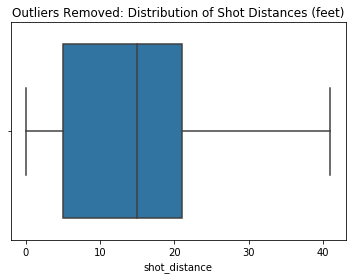

In [32]:
#Outliers Removed (box plot)
sns.boxplot(x=x['shot_distance'])
plt.title("Outliers Removed: Distribution of Shot Distances (feet)")

Text(0.5, 1.0, 'Outliers Removed: Distribution of Made Shot Distances (feet)')

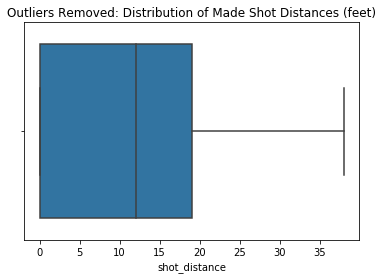

In [33]:
# Made Outliers Present (box plot)
sns.boxplot(x=made['shot_distance'])
plt.title("Outliers Removed: Distribution of Made Shot Distances (feet)")

Text(0.5, 1.0, 'Outliers Removed: Distribution of Missed Shot Distances (feet)')

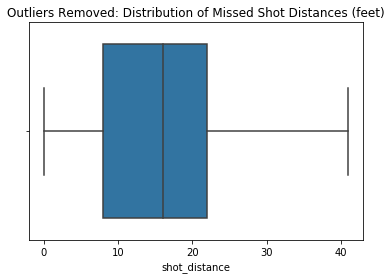

In [34]:
# Missed Outliers Present (box plot)
sns.boxplot(x=missed['shot_distance'])
plt.title("Outliers Removed: Distribution of Missed Shot Distances (feet)")

In [35]:
#Feature Engineering

#converting arbitrary x,y data into feet where negative x = feet a shot from the right and positive equals a shot from the left
x['x_feet'] = x['loc_x'] / 10.103324229867473
x['y_feet'] = x['loc_y'] / 10.103324229867473
print(x['x_feet'].head(5))
print(x['y_feet'].head(5))

# inverse sin(y/shot_distance)
x['angle_from_basket'] = np.arctan((x['y_feet']/x['x_feet'])) * (180/ math.pi)
print(x['angle_from_basket'].head(5))

0    16.529213
1   -15.539440
2    -9.996710
3    13.658871
4     0.000000
Name: x_feet, dtype: float64
0     7.126367
1     0.000000
2    13.361939
3    17.321032
4     0.000000
Name: y_feet, dtype: float64
0    23.322697
1    -0.000000
2   -53.198069
3    51.741697
4          NaN
Name: angle_from_basket, dtype: float64


/Users/willhawkins/anaconda2/envs/DataScience3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in arctan
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Missed Shot (units = feet)')

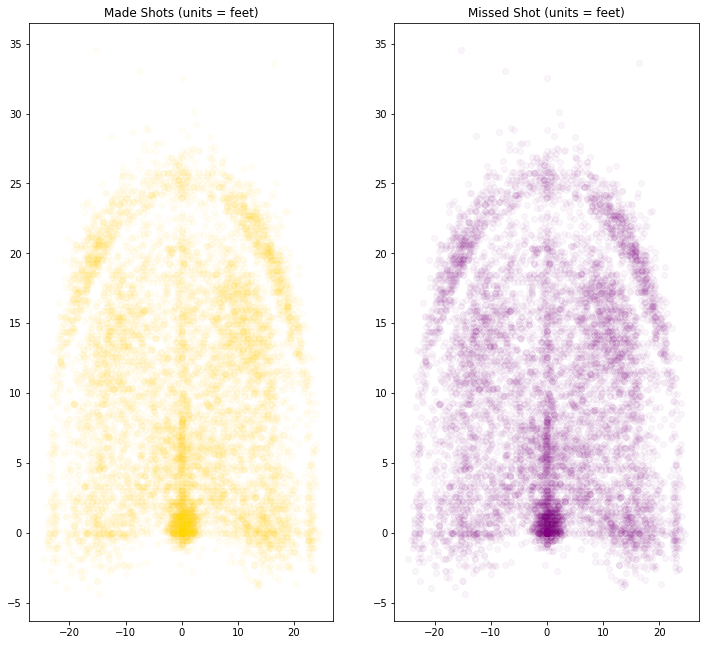

In [36]:
# Let's figure out what the loc_x, loc_y, lon, lat mean

nona = x[pd.notnull(x['shot_made_flag'])]
made = x.loc[x['shot_made_flag'] == 1]
missed = x.loc[x['shot_made_flag'] == 0]


alpha = 0.04
plot = plt.figure(figsize=(12,11))
draw_court(outer_lines=True)

# loc_x and loc_y
plt.subplot(121)
plt.scatter(made.x_feet, made.y_feet, color='gold', alpha=alpha)
plt.title('Made Shots (units = feet)')

plt.subplot(122)
plt.scatter(made.x_feet, made.y_feet, color='purple', alpha=alpha)
plt.title('Missed Shot (units = feet)')


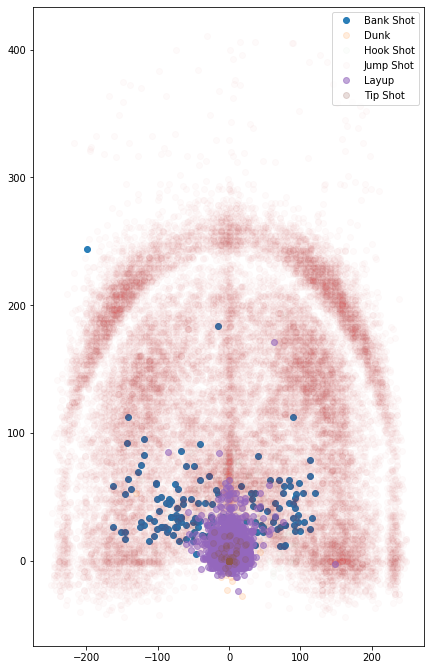

In [37]:
# Make for-loop that plots a graph for each shot type

court_scale, alpha = 7, 0.05
groups = x.groupby('combined_shot_type')

fig, ax = plt.subplots(figsize=(court_scale, court_scale*(84.0/50.0)))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
alpha = 0.2
alphas, n = [], float(len(x.combined_shot_type))
for u in [i[0] for i in groups]:
    d = len(x.loc[x.combined_shot_type == u, 'combined_shot_type'])
    alphas.append(np.log1p(d))
for (name, group), alp in zip(groups, alphas):
    ax.plot(group.loc_x, group.loc_y,
            marker='.', linestyle='', ms=12,
            label=name, alpha=alp)
ax.legend()

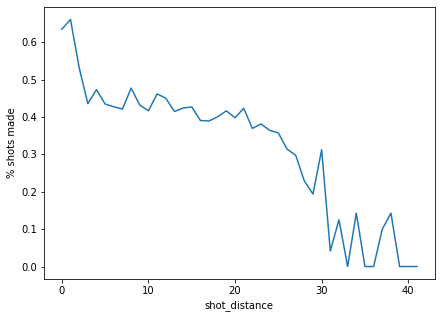

In [38]:
# Shooting accuracy with shot distance
def get_acc(x, against):
    ct = pd.crosstab(x.shot_made_flag, x[against]).apply(lambda x:x/x.sum(), axis=0)
    x, y = ct.columns, ct.values[1, :]
    plt.figure(figsize=(7, 5))
    plt.plot(x, y)
    plt.xlabel(against)
    plt.ylabel('% shots made')
    plt.savefig(against + '_vs_accuracy.png')
get_acc(x, 'shot_distance')

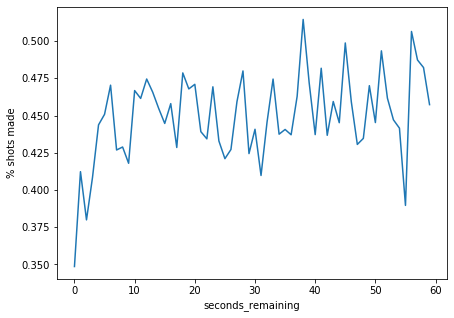

In [39]:
# What can we learn from time?
get_acc(x, 'seconds_remaining')


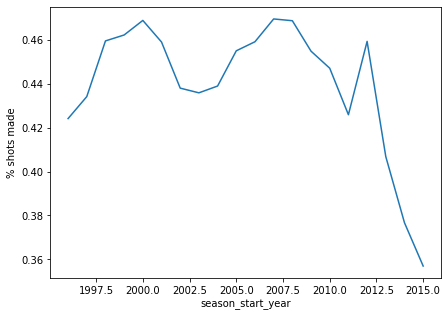

In [40]:
# Not much variation there either. Kobe is really consistent.
# let's see season
#print(x.season.unique())
x['season_start_year'] = x.season.str.split('-').str[0]
x['season_start_year'] = x['season_start_year'].astype(int)
get_acc(x, 'season_start_year')

In [41]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [42]:
hist_range = [[x.loc_x.min(), x.loc_x.max()],
              [x.loc_y.min(), x.loc_y.max()]]

bin_num = 50
shots, _, _ = np.histogram2d(x.loc[x.shot_made_flag == 1.0,'loc_x'],
               x.loc[x.shot_made_flag == 1.0,'loc_y'],
              bins = bin_num, range = hist_range)
totals, edges_x, edges_y = np.histogram2d(x.loc[:,'loc_x'],
               x.loc[:,'loc_y'],
              bins = bin_num, range = hist_range)
shot_probability = np.true_divide(shots,totals)

/Users/willhawkins/anaconda2/envs/DataScience3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


/Users/willhawkins/anaconda2/envs/DataScience3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


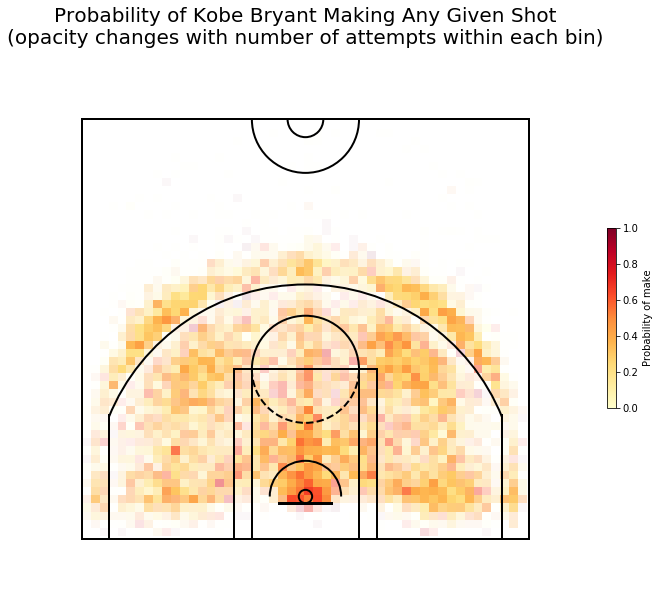

In [43]:
color_map = 'YlOrRd'

shot_probability_w_alpha = plt.get_cmap(color_map)(transpose(fliplr(shot_probability))) # align histograms with the basketball court sketch
totals = scism.winsorize(totals, (.05, .05))
alpha_channel = transpose(fliplr(totals/totals.max()))
shot_probability_w_alpha[:,:,3] = alpha_channel
# this is a workaround here because of matplotlib imshow rgba behaviour https://github.com/matplotlib/matplotlib/issues/3343
# I create the alpha behaviour manually using white background
shot_probability_w_alpha = (shot_probability_w_alpha[..., :-1] * shot_probability_w_alpha[..., -1].reshape(bin_num, bin_num, 1) +
                            (1 - shot_probability_w_alpha[..., -1]).reshape(bin_num, bin_num, 1))

plot = plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
X, Y = np.meshgrid(edges_x, edges_y)
plt.imshow(shot_probability_w_alpha, cmap = color_map, 
           interpolation = 'nearest',
          extent = [edges_x[0], edges_x[-1], edges_y[0], edges_y[-1]])
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.axis('off')
plt.clim(0,1)
plt.colorbar(shrink = 0.3, label = 'Probability of make', cmap = color_map)
plt.title('Probability of Kobe Bryant Making Any Given Shot\n(opacity changes with number of attempts within each bin)', size = 20)
plt.show()

plot.savefig("shot_probabilities.png")